<div style="text-align:center; padding: 30px; background: linear-gradient(45deg, #3498db, #c0392b); border-radius: 15px; color: #ffffff; box-shadow: 0 10px 20px rgba(0, 0.1, 0.2, 0.3);">
  <h1 style="font-family: 'Comicsans', cursive; font-size: 40px; font-weight: bold; letter-spacing: 2px; text-transform: uppercase; margin-bottom: 10px;">Movie Rating Prediction Model</h1>
</div>


<div style="text-align:center; padding: 20px; background-color: #f2f2f2; border-radius: 10px; border: 2px solid #3498db;">
  <h1 style="color: #3498db;">Data Analysis</h1>
</div>


In [1]:
# First of all we will import all the necessary libraries required for Data Model
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Now we will import the data set using dataframe
df_movie_data = pd.read_excel("Movie_Rating_Prediction.xlsx")

In [3]:
# Now we will print 1st 5 rows of dataframe using head() function
df_movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
# Here we will get some information about the data using info function
df_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [5]:
# Now we will get some statistical measures regarding the data for data analysis 
df_movie_data.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


<div style="text-align:center; padding: 20px; background-color: #f2f2f2; border-radius: 10px; border: 2px solid #3498db;">
  <h1 style="color: #3498db;">Data Preprocessing</h1>
</div>


In [6]:
# So firstly we will find all the columns of dataset
df_movie_data.columns


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [7]:
# So firstly we will check the number of missing values in each column (these are valid null values)
df_movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
# Now we will find number of rows and columns with the help of shape function
shape = df_movie_data.shape
print("Number of rows is:",shape[0],",Number of columns:",shape[1])

Number of rows is: 15509 ,Number of columns: 10


In [9]:
# Now we will find the unique values from the dataset
unique_genres = df_movie_data['Genre'].unique()
print("Unique genres : ",unique_genres)

Unique genres :  ['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Famil

In [10]:
# Now we will find rating distribution from the dataset
rating_dist = df_movie_data['Rating'].value_counts()
print("Rating distribution : \n",rating_dist)

Rating distribution : 
 6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64


In [11]:
# Now we will drop duplicate values
df_movie_data.drop_duplicates(inplace=True)

In [12]:
# Now we will find the number of missing values
attributes = ['Name','Year','Duration','Votes','Rating']
df_movie_data.dropna(subset = attributes, inplace = True)
missing_val = df_movie_data.isna().sum()
print(missing_val)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [13]:
df_movie_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [14]:
# We will find movie name & rating
movie_name_rating =  df_movie_data[['Name','Rating']]
print([movie_name_rating.head()])

[                                 Name  Rating
1  #Gadhvi (He thought he was Gandhi)     7.0
3                             #Yaaram     4.4
5                ...Aur Pyaar Ho Gaya     4.7
6                           ...Yahaan     7.4
8                  ?: A Question Mark     5.6]


<div style="text-align:center; padding: 20px; background-color: #f2f2f2; border-radius: 10px; border: 2px solid #3498db;">
  <h1 style="color: #3498db;">Visualization of Dataset</h1>
</div>


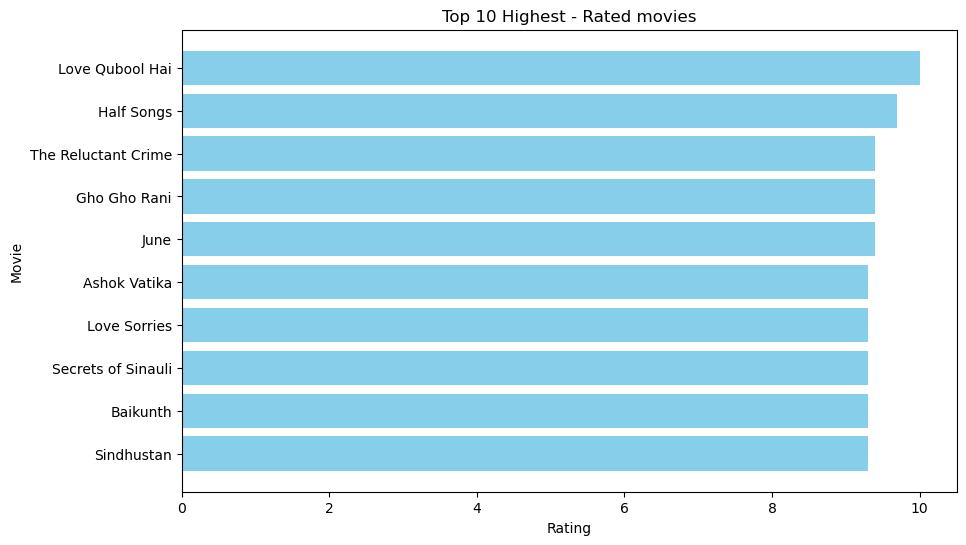

In [15]:
# Now we will show the top - rated movies on graph
top_rated_movies = df_movie_data.sort_values(by = 'Rating' , ascending = False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_rated_movies['Name'],top_rated_movies['Rating'],color='skyblue')
plt.xlabel('Rating') # Label for the x axis(Rating)
plt.ylabel('Movie') # Label for the x axis(Movie)
plt.title('Top 10 Highest - Rated movies')
plt.gca().invert_yaxis()
plt.show()

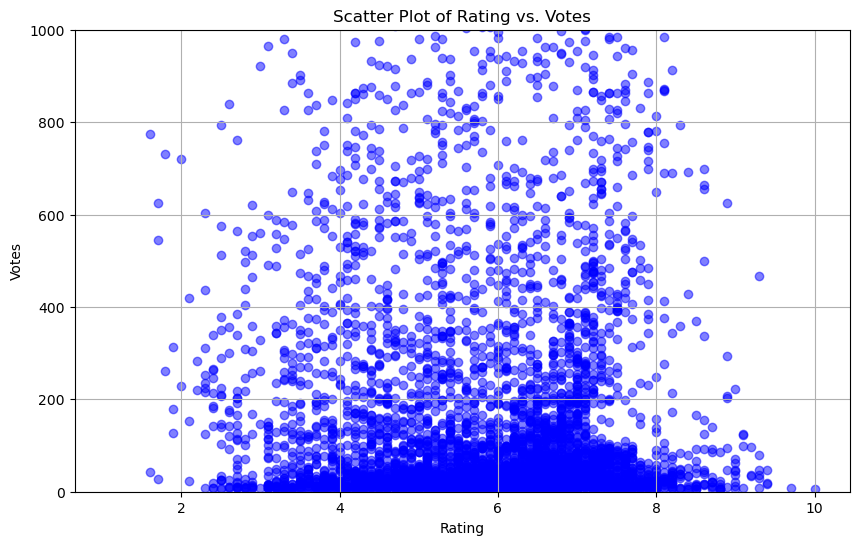

In [16]:
# Now we will show the scatter plot of rating vs. votes
df_movie_data['Votes'] = pd.to_numeric(df_movie_data['Votes'] , errors = 'coerce')
plt.figure(figsize=(10,6))
plt.scatter(df_movie_data['Rating'],df_movie_data['Votes'],alpha=0.5,color='b')
plt.xlabel('Rating') # Label for the x axis(Rating)
plt.ylabel('Votes') # Label for the x axis(Movie)
plt.ylim(0, 1000)
plt.title('Scatter Plot of Rating vs. Votes')
plt.grid(True)
plt.show()

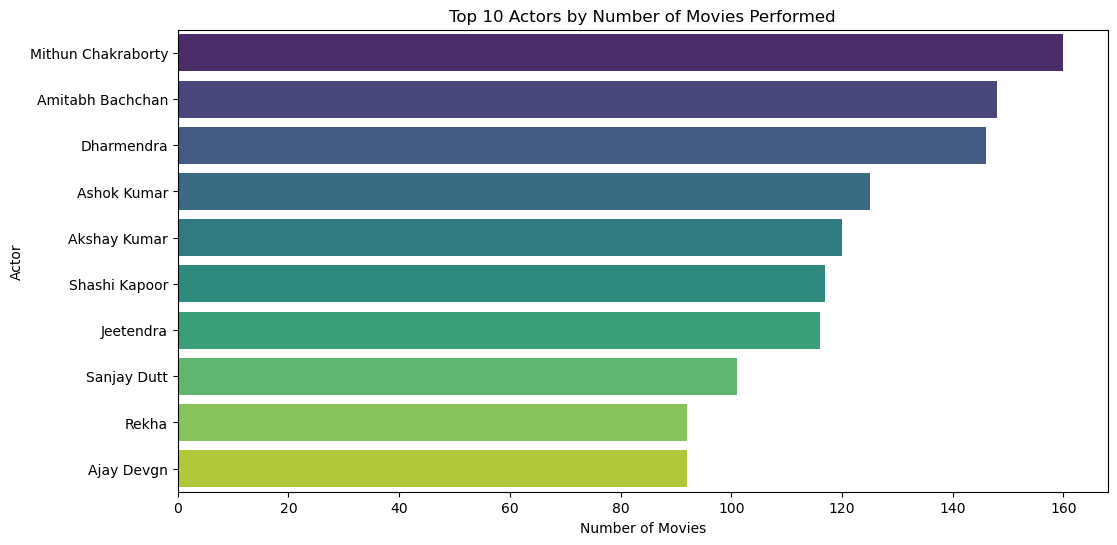

In [17]:
# Now we will plot a bar graph for Actors and Number of Moives 
actors = pd.concat([df_movie_data['Actor 1'],df_movie_data['Actor 2'],df_movie_data['Actor 3']])
actor_counts = actors.value_counts().reset_index()
actor_counts.columns = ['Actor','Number of Movies']
plt.figure(figsize =(12,6))
sns.barplot(x='Number of Movies', y='Actor',data=actor_counts.head(10),palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of Movies Performed')
plt.show()

<Figure size 1000x600 with 0 Axes>

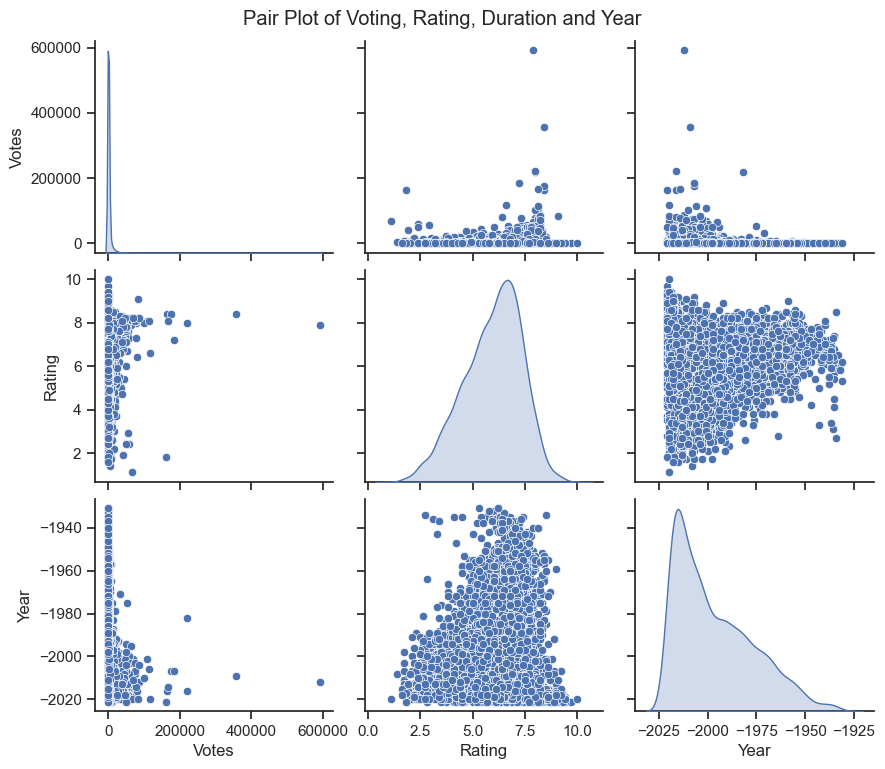

In [18]:
# Here , we will plot the a+pairplot for the respective columns
columns_of_interest = ['Votes','Rating','Duration','Year']
sns.set(style = 'ticks')
plt.figure(figsize =(10,6))
sns.pairplot(df_movie_data[columns_of_interest],diag_kind='kde',markers='o',palette='virdis',height = 2.5,aspect=1.2)
plt.suptitle('Pair Plot of Voting, Rating, Duration and Year',y = 1.02)
plt.show()

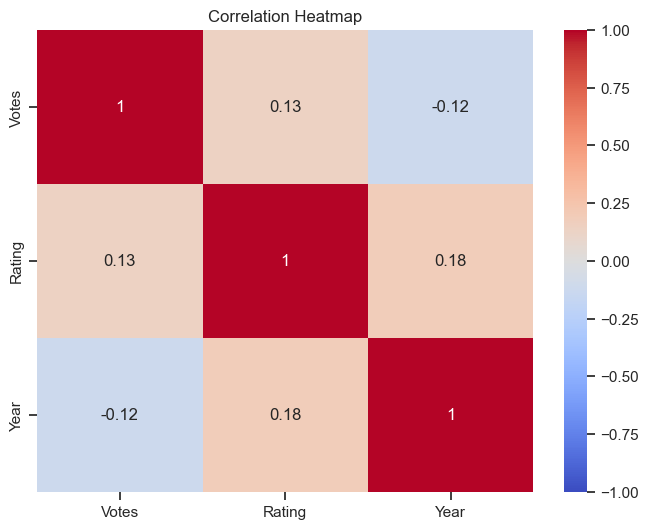

In [19]:
numerical_columns = ['Votes','Rating','Duration','Year']
correlation_matrix = df_movie_data[numerical_columns].corr()
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',vmin= -1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

<div style="text-align:center; padding: 20px; background-color: #f2f2f2; border-radius: 10px; border: 2px solid #3498db;">
  <h1 style="color: #3498db;">Feature Engineering</h1>
</div>


In [20]:
# Here we will find PErcintile of the data
dataset_sorted = df_movie_data.sort_values(by = 'Votes' , ascending = False)
dataset_sorted['Vote_Count_Percentile'] = dataset_sorted['Votes'].rank(pct = True) * 100
dataset_sorted.reset_index(drop = True,inplace = True)
print(dataset_sorted[['Name','Votes','Vote_Count_Percentile']])

                        Name   Votes  Vote_Count_Percentile
0                 Life of Pi  591417             100.000000
1                   3 Idiots  357889              99.982909
2                       Lion  220526              99.965818
3                     Gandhi  220118              99.948727
4     The Darjeeling Limited  185127              99.931636
...                      ...     ...                    ...
5846          Romeo N Bullet       5               0.410186
5847          Kadke Kamal Ke       5               0.410186
5848              Naami Chor       5               0.410186
5849             Chori Chori       5               0.410186
5850              Night Club       5               0.410186

[5851 rows x 3 columns]


In [21]:
df_movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [22]:
dataset = df_movie_data.dropna(subset = ['Votes'])
df_movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


<div style="text-align:center; padding: 20px; background-color: #f2f2f2; border-radius: 10px; border: 2px solid #3498db;">
  <h1 style="color: #3498db;">Model Training & Testing</h1>
</div>


In [23]:
#Now we will split data into training data & test data
df_movie_data['Year'] = df_movie_data['Year'].astype(str)
df_movie_data['Duration']=df_movie_data['Duration'].astype(str)
df_movie_data['Year'] = df_movie_data['Year'].str.extract('(\d+)').astype(float)
df_movie_data['Duration'] = df_movie_data['Duration'].str.extract('(\d+)').astype(float)
X = df_movie_data[['Year','Duration','Votes']]
y = dataset['Rating']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [24]:
# Linear Regression
model = LinearRegression()

In [25]:
# Training the linear regression model with training data
model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

<div style="text-align:center; padding: 20px; background-color: #f2f2f2; border-radius: 10px; border: 2px solid #3498db;">
  <h1 style="color: #3498db;">Model Evaluation</h1>
</div>


In [27]:
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared= False)
r2 = r2_score(y_test,y_pred)
print("Mean Absolute Error : ",mae)
print("Root Mean Squared Error : ",rmse)
print("R - Squared Score :",r2)

Mean Absolute Error :  1.0668333990630767
Root Mean Squared Error :  1.3396081919646998
R - Squared Score : 0.03545593151824511


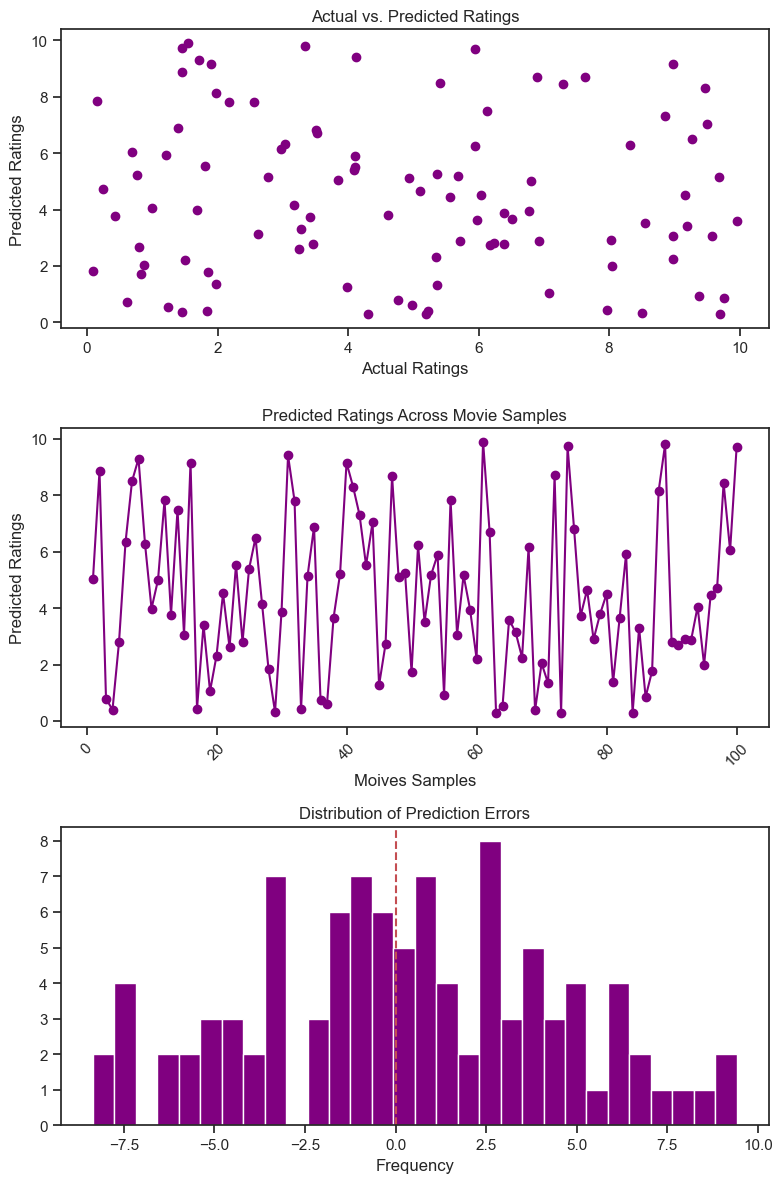

In [36]:
y_test = np.random.rand(100) * 10  #Actual ratings
y_pred = np.random.rand(100) * 10  #Predicted ratings
errors = y_test - y_pred
fig, axs = plt.subplots(3,1,figsize = (8,12))
axs[0].scatter(y_test,y_pred,color="Purple")
axs[0].set_xlabel("Actual Ratings")
axs[0].set_ylabel("Predicted Ratings")
axs[0].set_title("Actual vs. Predicted Ratings")

# Line Plot
movie_samples = np.arange(1,len(y_pred) +1)
axs[1].plot(movie_samples,y_pred,marker='o',linestyle = '-',color="Purple")
axs[1].set_xlabel("Moives Samples")
axs[1].set_ylabel("Predicted Ratings")
axs[1].set_title("Predicted Ratings Across Movie Samples")
axs[1].tick_params(axis = 'x', rotation = 45)

# Histogram
axs[2].hist(errors,bins = 30,color='Purple')
axs[2].set_xlabel("Prediction Errors")
axs[2].set_xlabel("Frequency")
axs[2].set_title("Distribution of Prediction Errors")
axs[2].axvline(x = 0,color = 'r',linestyle= '--')
plt.tight_layout()
plt.show()